# Atividade Titanic - Decision Tree

* **Nome:** Henricky de Lima Monteiro

* **Matricula:** 475075

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import graphviz 
from subprocess import check_call

In [3]:
df = pd.read_csv("train.csv")
df.shape

(891, 12)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Remover os NAN dos dados
df = df.dropna()
# converter os dados da tabela Sex para uma nova coluna de forma numérica
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
# mesma coisa, mas como são 3 tipos de dados ele cria 2 colunas com dados binários se é ou não é
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
y = df["Survived"]
X = df.drop(["Survived", "Name", "Ticket", "Cabin", "PassengerId"], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
X

146 37


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,0,0,0
3,1,35.0,1,0,53.1000,0,0,1
6,1,54.0,0,0,51.8625,1,0,1
10,3,4.0,1,1,16.7000,0,0,1
11,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,0,0,1
872,1,33.0,0,0,5.0000,1,0,1
879,1,56.0,0,1,83.1583,0,0,0
887,1,19.0,0,0,30.0000,0,0,1


In [7]:
# Padronizando os dados de treino e teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#calcular a previsão do modelo para treino  e teste
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)
#avaliar a predição para os dois o que foi usado para treinar e o que não
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [9]:
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=list(X),  
                           class_names = ['Died', 'Survived'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("titanic_tree") 

'titanic_tree.pdf'

In [10]:
# Calcula o erro absoluto médio e o erro quadrático médio para o conjunto de treino e teste
abs_train = mean_absolute_error(y_train, y_train_pred)
sqr_train = mean_squared_error(y_train, y_train_pred)
abs_test = mean_absolute_error(y_test, y_test_pred)
sqr_test = mean_squared_error(y_test,y_test_pred)


In [11]:
print("Erro absoluto médio (treino):", abs_train)
print("Erro quadrático médio (treino):", sqr_train)
print("Erro absoluto médio (teste):", abs_test)
print("Erro quadrático médio (teste):", sqr_test)

Erro absoluto médio (treino): 0.2054794520547945
Erro quadrático médio (treino): 0.2054794520547945
Erro absoluto médio (teste): 0.1891891891891892
Erro quadrático médio (teste): 0.1891891891891892


Neste ponto podemos verificar que para esse exemplo, onde a profundidade máxima da árvore de decisão (max_depth) igual a 3 obtemos uma resposta, porém teriamos que verificar qual o valor de profundidade melhor se adapta ao nosos problema.

In [15]:
abs_train_list = []
sqr_train_list = []
abs_test_list = []
sqr_test_list = []
y_train_pred_list = []
y_test_pred_list = []
sizes = range(1, len(list(X)))
for d in sizes:
    #calcular a previsão do modelo para treino  e teste
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train_scaled, y_train)
    #avaliar a predição para os dois o que foi usado para treinar e o que não
    y_train_pred = model.predict(X_train_scaled)
    y_train_pred_list.append(y_train_pred)
    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_list.append(y_test_pred)

    abs_train = mean_absolute_error(y_train, y_train_pred)
    abs_train_list.append(abs_train)
    sqr_train = mean_squared_error(y_train, y_train_pred)
    sqr_train_list.append(sqr_train)
    abs_test = mean_absolute_error(y_test, y_test_pred)
    abs_test_list.append(abs_test)
    sqr_test = mean_squared_error(y_test,y_test_pred)
    sqr_test_list.append(sqr_test)

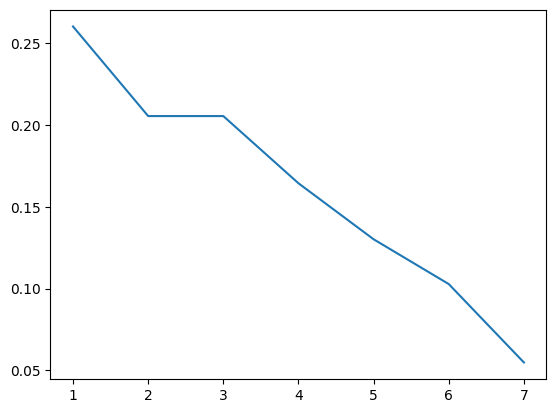

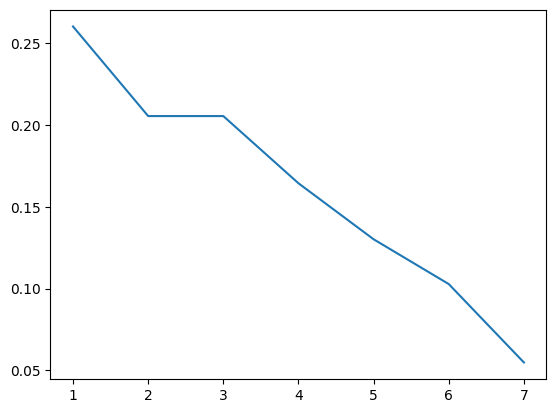

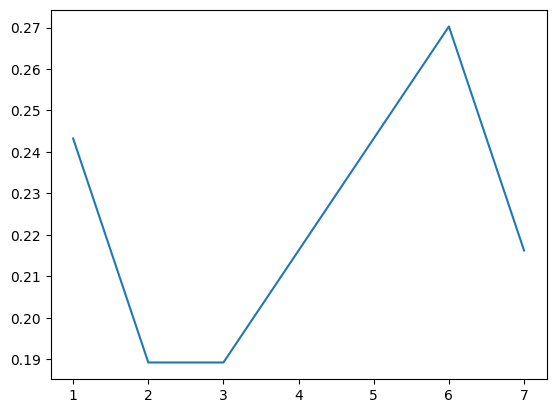

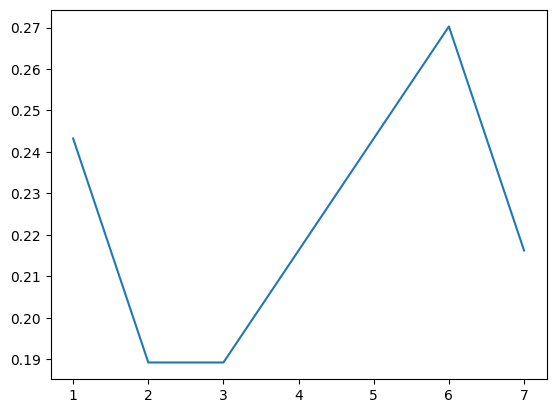

In [17]:
plt.plot(sizes, abs_train_list)
plt.show()
plt.plot(sizes, sqr_train_list)
plt.show()
plt.plot(sizes, abs_test_list)
plt.show()
plt.plot(sizes, sqr_test_list)
plt.show()